# Holland  Parametric Model

This is a reference notebook for testing and exploring the model.  Check also the interactive version [here](./Interactive Holland.ipynb).

In [1]:
%matplotlib notebook

First we define some parameters

In [2]:
import numpy as np
# -------------------------------------------------------------------------
# Const
# -------------------------------------------------------------------------
nm2m=1852. # 1 nautical mile to meters
kt2ms=nm2m/3600.  # knots to m/s
omega=2*np.pi/(3600.*24.) # angular speed omega=2pi*f(=frequency of earth : 1 cycle per day) 2pi* 1 / day in seconds
rhoa=1.15 #air density  Kg/m^3
radius=6378388 #137. # earth's radius according to WGS 84
deg2m=np.pi*radius/180.  # ds on cicle equals ds=r*dth - dth=pi/180
pn=101000.  # Atmospheric pressure [N/m^2] (101KPa - enviromental pressure)

tetaNE=45. #mean angle [degrees] of North Eastern quadrant
tetaNW=135. #        "              North Western
tetaSW=225. #        "              South West
tetaSE=315. #        "              South East

maxR=500.e3  # maximum radius of TC [m] (500Km)

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

### Holland Equation

In [5]:
def hvel(r):
    x=0.5+(r-rmaxh)/(maxR-rmaxh)*kh
    return (bh/rhoa*(rmaxh/r)**bh*dph*np.exp(-(rmaxh/r)**bh))**x

In [6]:
#specify the required parameters, e.g.
bh=.81
vmaxh=41.15
kh=.04
rmaxh=21090.
dph=4350.
pch=pn-dph

In [7]:
rh=np.linspace(1e-5,5*rmaxh,100) # avoid zero value

In [8]:
u=hvel(rh)

<IPython.core.display.Javascript object>


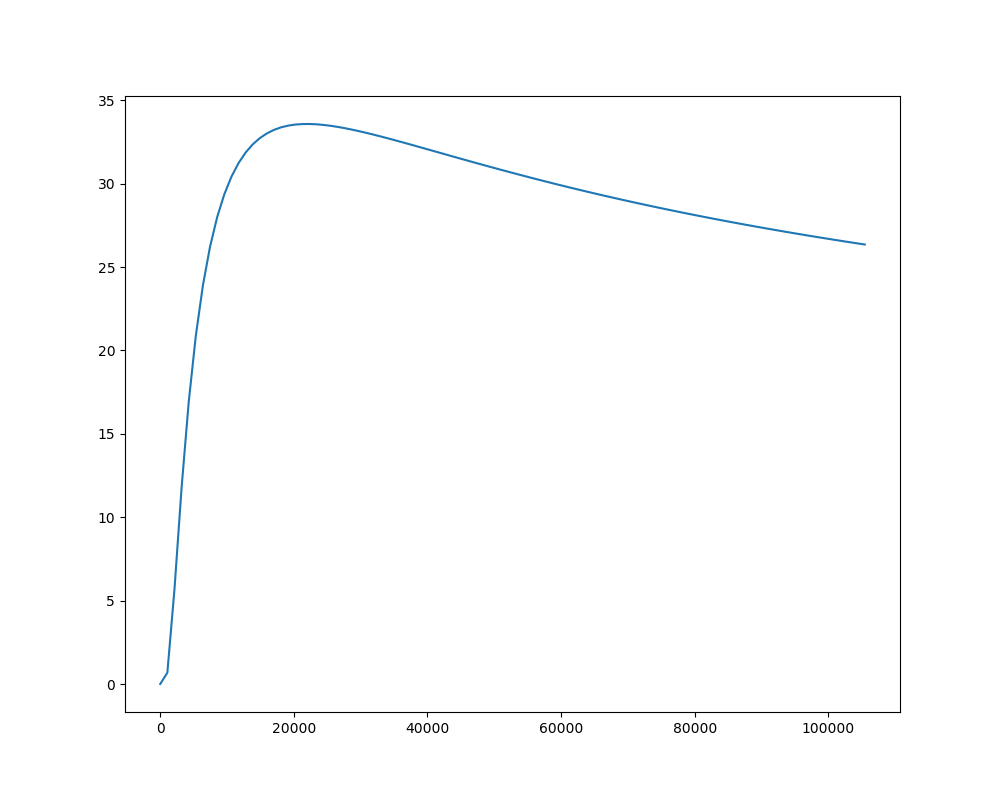

In [9]:
plt.figure(figsize=(10,8))
plt.plot(rh,u)
plt.show()

In [10]:
def pres(r):
    return pch+dph*np.exp(-(rmaxh/r)**bh)

In [11]:
pp=pres(rh)

<IPython.core.display.Javascript object>


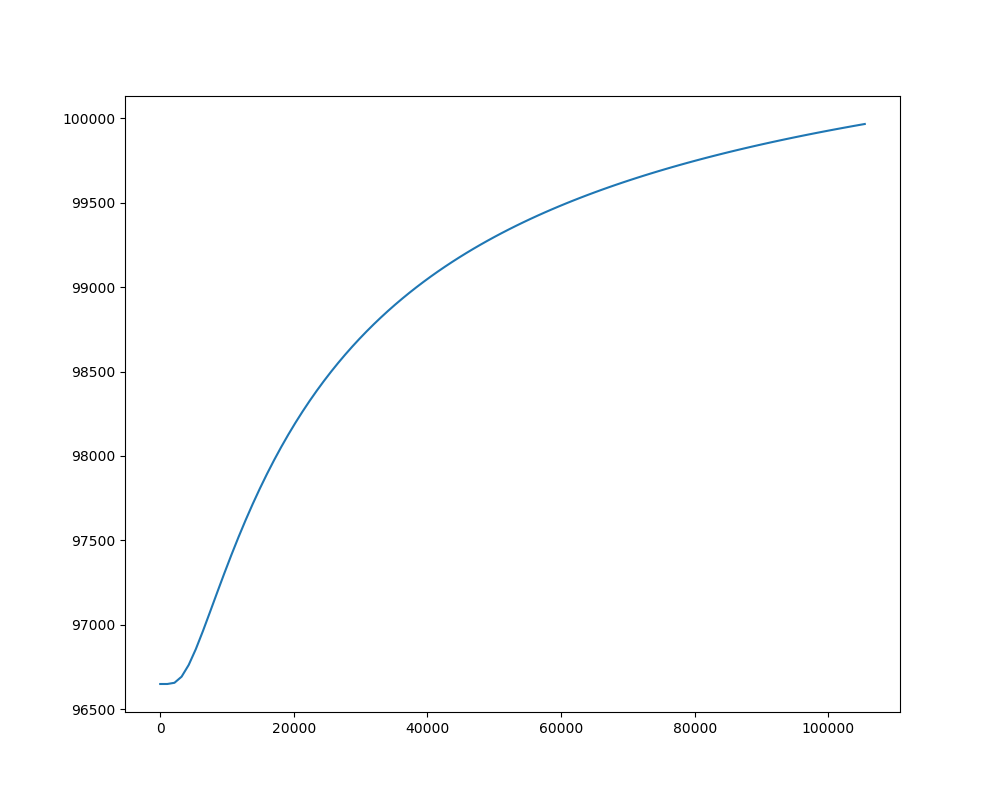

In [12]:
plt.figure(figsize=(10,8))
plt.plot(rh,pp)
plt.show()

In [13]:
xl=np.linspace(-maxR, maxR,1000)
yl=np.linspace(-maxR, maxR,1000)
q1,q2=np.meshgrid(xl,yl)
vtx=-4.6
vty=3.35

In [14]:
def hvel2d(l1,l2):
    r=np.sqrt(l1**2+l2**2)
    xh=0.5+(r-rmaxh)/(maxR-rmaxh)*kh
    ur=(bh/rhoa*(rmaxh/r)**bh*dph*np.exp(-(rmaxh/r)**bh))**xh
    theta=np.arctan2(l2,l1)
    ux=-ur*np.sin(theta)
    uy=ur*np.cos(theta)
    return ux+vtx,uy+vty, pres(r)

In [15]:
zx,zy, pr=hvel2d(q1,q2)
vel=np.sqrt(zx**2+zy**2)

<IPython.core.display.Javascript object>


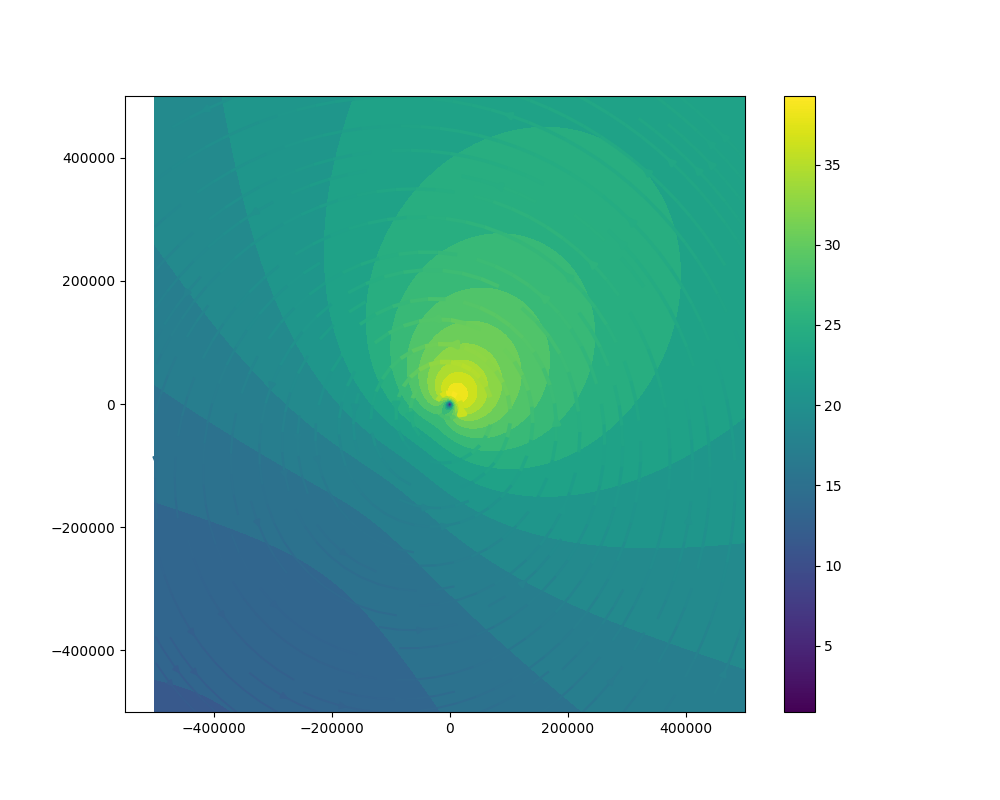

In [16]:
plt.figure(figsize=(10,8))
plt.contourf(q1,q2,vel,20)
plt.streamplot(q1,q2,zx,zy, color=vel, linewidth=0.1*vel)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


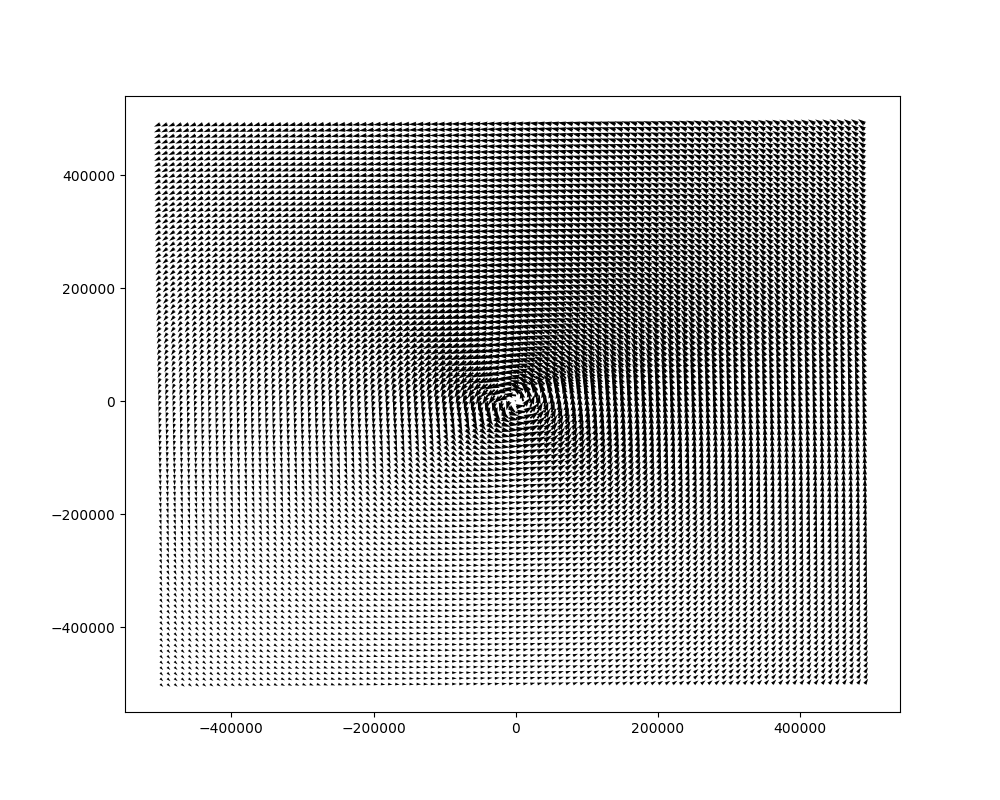

In [17]:
plt.figure(figsize=(10,8))
plt.quiver(q1[::10,::10],q2[::10,::10],zx[::10,::10],zy[::10,::10], units='x', angles='xy',scale=1./500)
plt.show()